 # <span style="font-family: Trebuchet MS; font-weight:bold;font-size:1.5em;color:#00b3e5;">  Project in Neural Network(NN)

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:1.5em;color:#00b3e5;">  Import all required modules

In [125]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import math as math
import matplotlib.pyplot as plt

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:1.2em;color:#00b3e5;"> Common Functions 

In [126]:
# Function to print Dataframe details like as I like :)
def print_df_details(df):
    print("\n****** Start Dataframe Details ******")
    print("Dataframe Shape is ")
    print(df.shape)
    print("Dataframe Info is ")
    print(df.info())
    print("Dataframe random records ")
    display(df.sample(5) if len(df) > 5 else df.sample(1))
    print("****** End Dataframe Details ******\n")

In [127]:
# Function to print Classification Matrix
# TODO - ?
def print_metrics(test, labels):
    #print(f"accuracy = {accuracy_score(test, labels)} "
          #f"precision = {precision_score(test, labels, pos_label='Yes')} "
          #f"recall = {recall_score(test, labels, pos_label='Yes')} "
          #f"f1-score = {f1_score(test, labels, pos_label='Yes')}")
    print("classification  Matrix:\n",classification_report(test,labels))

In [128]:
def print_inference(value, txt):    
    if (type(value) == str):
        print(f"[{value}] {txt}")
    elif (isinstance(value, list) == True):
        print(f"{value} [{len(value)}] {txt}")
    else:
        print(f"{value} {txt}")

In [129]:
# Read file and convert it to Dataframe
def file_to_df(fqfn, file_type='csv'):
    df = 'None'
    # We are only handling csv files. How about .dat
    # We are also using "skipinitialspace" parameter so that we 
    # can save some time in preprocessing later (ie, otherwise should do strip)
    if (file_type == 'csv'):
        df = pd.read_csv(fqfn, skipinitialspace = True)
    else:
        raise ValueError('Unsupported filetype ', file_type)
    print_df_details(df)
    return df

In [130]:
# To start with - tried using the formula. However later figured out
# functions like 'skew' in dataframe which provides the skenwess for
# all numeric data. Currently making use of the skew function later
# we need to check if there is a more suitable way to get all the skewness.
# Irrespective of that - we should find a better way to convey almost
# normal, slightly left skewed, extreme right skewed, etc.
def find_skeweness(data):
    rt_skewed_col = []
    lt_skewed_col = []
    nl_skewed_col = []
    #Skew = 3 * (Mean – Median) / Standard Deviation
    series = data.skew(axis='index',skipna=True,numeric_only=True)
    # print(series)
    for column in data.select_dtypes(include=[np.number]).columns:
        if (series[column] == float(0)):
            #print_inference(column, " is normally distributed")
            nl_skewed_col.append(column)
        elif (series[column] < float(0)):
            #print_inference(column, " is left skewed")
            lt_skewed_col.append(column)
        elif (series[column] > float(0)):
            #print_inference(column, " is right skewed")
            rt_skewed_col.append(column)
            
    return rt_skewed_col, lt_skewed_col, nl_skewed_col

In [131]:
# Trying to analyse five point summary details and tyring for automation
def five_point_summary(data):
    # Summary Data and Index
    sd = None
    si = ['count','unique','top','freq','mean','std','min','25%','50%','75%','max']
    
    # Columns in dataframe
    columns = data.columns
    
    # For now - let us use transposed describtion and print it
    sd = data.describe(include='all').T
    display(sd)
    
    # Number of rows and columns in the dataframe
    nr = data.shape[0]
    nc = data.shape[1]
    
    nl_columns = []
    cat_columns = []
   
    # Inferences based out of count
    # Do this for all column
    for column in columns:
        if (int(sd[si[0]][column]) != nr):
            #print_inference(column, "is having some null or empty row or missing value")
            nl_columns.append(column)
        
    # Inferences based out of unique
    cc = []
    for column in columns:
        if (sd[si[1]][column] >= 2 and sd[si[1]][column] <= 5):
             cc.append(column)
    if (len(cc) > 0):
        #print_inference(cc, "can be a category column")
        cat_columns.append(column)
        
    # Inferences based out of top and freq
    # Balanced column or not
    id_c = []
    nm_c = []
    bl_c = []
    imbl_c = []
    tpercent = 15
    for column in columns:
        freq = sd[si[3]][column]
        uv = sd[si[1]][column]
        count = int(sd[si[0]][column])
        top = sd[si[2]][column]
        tval = round(tpercent * count/100)
        #print_debug_msg(freq, uv, count, tval, column)
        
        if (math.isnan(freq)):
            nm_c.append(column)
        elif (freq == 1):
            id_c.append(column)
        else:           
            # Freq value should ideally be less than or equal 
            # to (count/unique + tval). We need to check and find
            # more closer formula
            if (freq > abs(((count/uv) + tval))):
                imbl_c.append(column)
            else:
                bl_c.append(column)
    
    if (len(nl_columns) > 0):
        print_inference(nl_columns, " Columns are having null or empty or missing value")
    if (len(cat_columns) > 0):
        print_inference(cat_columns, " Column can be a category column")
    if (len(id_c) > 0):
        print_inference(id_c," is an index column - we can drop")
    if (len(nm_c) > 0):
        print_inference(nm_c," is an numeric column")
    if (len(bl_c) > 0):
        print_inference(bl_c," is an blanced column")
    if (len(imbl_c) > 0):
        print_inference(imbl_c," is an imbalanced column")
    
    # Infereance based out of mean, median, etc
    # Skewness
    rt_skewed_col, lt_skewed_col, nl_skewed_col = find_skeweness(data)
    
    if (len(rt_skewed_col) > 0):
        print_inference(rt_skewed_col," Columns are right skewed")
    if (len(lt_skewed_col) > 0):
        print_inference(lt_skewed_col, " Columns are left skewed")
    if (len(nl_skewed_col) > 0):
        print_inference(nl_skewed_col, " Normally distributed")

#five_point_summary(data)

In [132]:
# NN - common functions which plots the accuracy vs val_accuracy, loss vs val_loss
# Today it takes result of the fit history and assumes it has history as needed
# TODO - We should generalize it
def plot_NN_accuracy(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')
    plt.show()

def plot_NN_loss(history):
    print(val_loss)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Loss value')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')
    plt.show()

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:1.2em;color:#00b3e5;"> Electronics and Telecommunication

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.7em;color:darkorange;">  Part A - Q1 A - Read the ‘Signals.csv’ as DatFrame and import required libraries.

In [133]:
df = file_to_df('signal.csv')
display(df.dtypes)


****** Start Dataframe Details ******
Dataframe Shape is 
(1599, 12)
Dataframe Info is 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Parameter 1      1599 non-null   float64
 1   Parameter 2      1599 non-null   float64
 2   Parameter 3      1599 non-null   float64
 3   Parameter 4      1599 non-null   float64
 4   Parameter 5      1599 non-null   float64
 5   Parameter 6      1599 non-null   float64
 6   Parameter 7      1599 non-null   float64
 7   Parameter 8      1599 non-null   float64
 8   Parameter 9      1599 non-null   float64
 9   Parameter 10     1599 non-null   float64
 10  Parameter 11     1599 non-null   float64
 11  Signal_Strength  1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None
Dataframe random records 


,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
1266,7.2,0.57,0.05,2.3,0.081,16.0,36.0,0.99564,3.38,0.60,10.3,6
1183,6.8,0.66,0.07,1.6,0.070,16.0,61.0,0.99572,3.29,0.60,9.3,5
641,9.5,0.59,0.44,2.3,0.071,21.0,68.0,0.99920,3.46,0.63,9.5,5
512,10.7,0.40,0.48,2.1,0.125,15.0,49.0,0.99800,3.03,0.81,9.7,6
962,6.6,0.57,0.02,2.1,0.115,6.0,16.0,0.99654,3.38,0.69,9.5,5


****** End Dataframe Details ******



Parameter 1        float64
Parameter 2        float64
Parameter 3        float64
Parameter 4        float64
Parameter 5        float64
Parameter 6        float64
Parameter 7        float64
Parameter 8        float64
Parameter 9        float64
Parameter 10       float64
Parameter 11       float64
Signal_Strength      int64
dtype: object

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.8em;color:green;"> <li> We have 11 feature and one target variable </li> <li> The target can be multilevel category column </li> <li> Features are numeric and not nullable </li>

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.7em;color:darkorange;"> Part A - Q1 B - Check for missing values and print percentage for each attribute.

In [134]:
display(df.describe(include='all'))
display(df.isnull().sum()/100)

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Parameter 1        0.0
Parameter 2        0.0
Parameter 3        0.0
Parameter 4        0.0
Parameter 5        0.0
Parameter 6        0.0
Parameter 7        0.0
Parameter 8        0.0
Parameter 9        0.0
Parameter 10       0.0
Parameter 11       0.0
Signal_Strength    0.0
dtype: float64

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.8em;color:green;"> <li> We have 1599 records </li> <li>Except Parameter-3 feature every other feature is having non-zero value for all the sample </li>

In [135]:
# Convert target column as category type
# How about writing a generic functions for type conversions
df['Signal_Strength']=df['Signal_Strength'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Parameter 1      1599 non-null   float64 
 1   Parameter 2      1599 non-null   float64 
 2   Parameter 3      1599 non-null   float64 
 3   Parameter 4      1599 non-null   float64 
 4   Parameter 5      1599 non-null   float64 
 5   Parameter 6      1599 non-null   float64 
 6   Parameter 7      1599 non-null   float64 
 7   Parameter 8      1599 non-null   float64 
 8   Parameter 9      1599 non-null   float64 
 9   Parameter 10     1599 non-null   float64 
 10  Parameter 11     1599 non-null   float64 
 11  Signal_Strength  1599 non-null   category
dtypes: category(1), float64(11)
memory usage: 139.3 KB


## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.7em;color:darkorange;">  Part A - Q1 C - Check for presence of duplicate records in the dataset and impute with appropriate method.

In [136]:
df[df.duplicated(keep='first')]

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1563,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1564,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1567,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1581,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5


## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.8em;color:green;"> The duplicate records will give high accuracy during in sample testing, will perform poor in out of sample. We have 240 duplicate records which we should remove.

In [137]:
# Remove duplicate using inplace=True
df.drop_duplicates(keep='first', inplace=True)
df.describe()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


In [138]:
# Get the count of Zeros in column 'C' 
(df['Parameter 3'] == 0).sum()

118

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.8em;color:green;"> We are not handling parameter-3 having zero

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.7em;color:darkorange;">   Part A - Q1 D - Visualise distribution of the target variable.


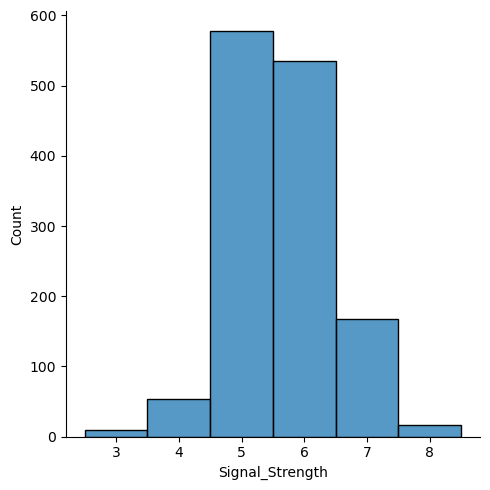

In [139]:
sns.displot(df, x="Signal_Strength", discrete=True)

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.8em;color:green;"> Not an balanced data sample where target 6 and 7 have almost 75% of records 

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.7em;color:darkorange;">   Part A - Q1 E - Share insights from the initial data analysis (at least 2).

In [140]:
five_point_summary(df)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Parameter 1,1359.0,NaN,NaN,NaN,8.310596,1.736990,4.60000,7.1000,7.9000,9.20000,15.90000
Parameter 2,1359.0,NaN,NaN,NaN,0.529478,0.183031,0.12000,0.3900,0.5200,0.64000,1.58000
Parameter 3,1359.0,NaN,NaN,NaN,0.272333,0.195537,0.00000,0.0900,0.2600,0.43000,1.00000
Parameter 4,1359.0,NaN,NaN,NaN,2.523400,1.352314,0.90000,1.9000,2.2000,2.60000,15.50000
Parameter 5,1359.0,NaN,NaN,NaN,0.088124,0.049377,0.01200,0.0700,0.0790,0.09100,0.61100
Parameter 6,1359.0,NaN,NaN,NaN,15.893304,10.447270,1.00000,7.0000,14.0000,21.00000,72.00000
Parameter 7,1359.0,NaN,NaN,NaN,46.825975,33.408946,6.00000,22.0000,38.0000,63.00000,289.00000
Parameter 8,1359.0,NaN,NaN,NaN,0.996709,0.001869,0.99007,0.9956,0.9967,0.99782,1.00369
Parameter 9,1359.0,NaN,NaN,NaN,3.309787,0.155036,2.74000,3.2100,3.3100,3.40000,4.01000
Parameter 10,1359.0,NaN,NaN,NaN,0.658705,0.170667,0.33000,0.5500,0.6200,0.73000,2.00000


['Parameter 1', 'Parameter 2', 'Parameter 3', 'Parameter 4', 'Parameter 5', 'Parameter 6', 'Parameter 7', 'Parameter 8', 'Parameter 9', 'Parameter 10', 'Parameter 11'] [11]  is an numeric column
['Signal_Strength'] [1]  is an imbalanced column
['Parameter 1', 'Parameter 2', 'Parameter 3', 'Parameter 4', 'Parameter 5', 'Parameter 6', 'Parameter 7', 'Parameter 8', 'Parameter 9', 'Parameter 10', 'Parameter 11'] [11]  Columns are right skewed


In [141]:
#sns.pairplot(df,hue='Signal_Strength',diag_kind='kde')

<AxesSubplot:>

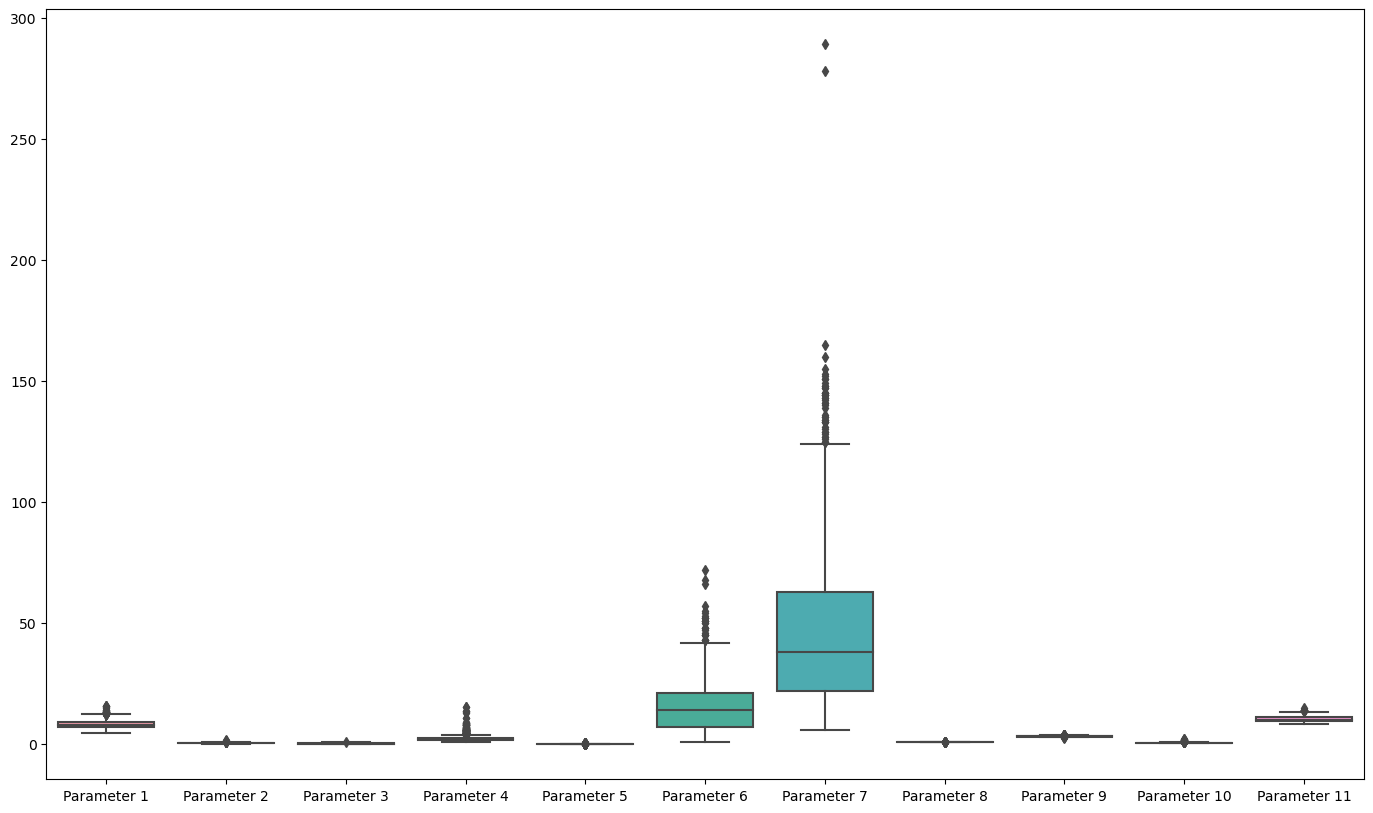

In [142]:
plt.figure(figsize=(17,10))
sns.boxplot(data=df)

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.8em;color:green;"> <li> Target Column is not balanced </li><li> All the features are having outlier and we are not treating them here</li> <li> All the features (1-11) are right skewed</li> <li>We have handled duplicates and not handling outliers</li>

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.7em;color:darkorange;">   Part A - Q2 A - Split the data into X & Y

In [143]:
X = df.drop('Signal_Strength',axis=1)     
Y = df['Signal_Strength']

display(X.sample(2))
display(Y.sample(2))

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11
1593,6.8,0.62,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5
227,9.0,0.82,0.14,2.6,0.089,9.0,23.0,0.99840,3.39,0.63,9.8


1171    6
586     7
Name: Signal_Strength, dtype: category
Categories (6, int64): [3, 4, 5, 6, 7, 8]

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.7em;color:darkorange;">  Part A - Q2 B - Split the data into train & test with 70:30 proportion.

In [144]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=143)
# 143 is just any random seed number

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.7em;color:darkorange;">  Part A - Q2 C - Print shape of all the 4 variables and verify if train and test data is in sync.

In [145]:
print(f"{x_train.shape} is X_train shape, {x_test.shape} X_test shape, {y_train.shape} is y_train shape, {y_test.shape} y_test shape")

(951, 11) is X_train shape, (408, 11) X_test shape, (951,) is y_train shape, (408,) y_test shape


## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.8em;color:green;"> Split looks good

In [146]:
display(x_train.head())

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11
1493,7.7,0.54,0.26,1.9,0.089,23.0,147.0,0.99636,3.26,0.59,9.7
110,7.8,0.56,0.19,1.8,0.104,12.0,47.0,0.99640,3.19,0.93,9.5
146,5.8,0.68,0.02,1.8,0.087,21.0,94.0,0.99440,3.54,0.52,10.0
408,10.4,0.34,0.58,3.7,0.174,6.0,16.0,0.99700,3.19,0.70,11.3
978,7.0,0.40,0.32,3.6,0.061,9.0,29.0,0.99416,3.28,0.49,11.3


In [147]:
display(x_test.head())

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11
533,10.3,0.27,0.24,2.1,0.072,15.0,33.0,0.99560,3.22,0.66,12.8
108,8.0,0.33,0.53,2.5,0.091,18.0,80.0,0.99760,3.37,0.80,9.6
693,9.0,0.48,0.32,2.8,0.084,21.0,122.0,0.99840,3.32,0.62,9.4
1377,5.2,0.49,0.26,2.3,0.090,23.0,74.0,0.99530,3.71,0.62,12.2
1149,10.0,0.35,0.47,2.0,0.061,6.0,11.0,0.99585,3.23,0.52,12.0


## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.8em;color:green;"> The data is not normalized and they are on completely different scale. Since the data is not normalized we can use MinMaxScaler 

In [148]:
# How many target values are possible
display(y_train.unique())
display(y_test.unique())

[5, 6, 7, 4, 8, 3]
Categories (6, int64): [3, 4, 5, 6, 7, 8]

[6, 5, 4, 7, 3, 8]
Categories (6, int64): [3, 4, 5, 6, 7, 8]

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.7em;color:darkorange;">  Part A - Q2 D - Normalise the train and test data with appropriate method.


In [149]:
from sklearn.preprocessing import MinMaxScaler

In [150]:
scaler = MinMaxScaler()
normalized_x_train = pd.DataFrame(
    scaler.fit_transform(x_train),
    columns = x_train.columns
)
display(normalized_x_train.sample(3))

# perform a robust scaler transform of the dataset
scaler = MinMaxScaler()
normalized_x_test = pd.DataFrame(
    scaler.fit_transform(x_test),
    columns = x_test.columns
)
display(normalized_x_test.sample(3))

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11
486,0.273585,0.281690,0.19,0.075342,0.081597,0.238806,0.360424,0.450073,0.456693,0.104294,0.196429
448,0.264151,0.563380,0.20,0.075342,0.022569,0.208955,0.190813,0.398678,0.488189,0.042945,0.446429
123,0.339623,0.035211,0.52,0.068493,0.097222,0.119403,0.060071,0.470631,0.488189,0.184049,0.357143


,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11
100,0.415929,0.404959,0.342105,0.180328,0.130217,0.318841,0.509434,0.725318,0.352941,0.179012,0.200000
3,0.053097,0.305785,0.342105,0.090164,0.130217,0.289855,0.427673,0.371019,0.813725,0.179012,0.584615
151,0.176991,0.314050,0.052632,0.073770,0.093489,0.043478,0.050314,0.386943,0.500000,0.191358,0.153846


## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.7em;color:darkorange;">  Part A - Q2 E - Transform Labels into format acceptable by Neural Network


In [151]:
from tensorflow import keras

In [152]:
#Perform one hot encoding
y_train_1h = keras.utils.to_categorical(y_train, num_classes=9, dtype='uint8')
y_train_1h[:3]

array([[0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0]], dtype=uint8)

In [153]:
y_test_1h = keras.utils.to_categorical(y_test, num_classes=9, dtype='uint8')
y_test_1h[:3]

array([[0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0]], dtype=uint8)

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.7em;color:darkorange;">  Part A - Q3 A - Design a Neural Network to train a classifier.


In [154]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense,LeakyReLU
from tensorflow.keras import optimizers

In [155]:
# The model which will 1 input and output layer with 3-hidden layer
# We will have 'relu' activation function for all hidden layer
# We will have softmax in output layer as we have multi-class target
def mlp_default_model():
    model = Sequential()
    model.add(Dense(144, input_shape = (normalized_x_train.shape[1], )))
    model.add(Activation('relu'))
    model.add(Dense(72))
    model.add(Activation('relu'))
    model.add(Dense(36))
    model.add(Activation('relu'))
    model.add(Dense(18))
    model.add(Activation('relu'))
    model.add(Dense(9))
    model.add(Activation('softmax'))
    my_optimizer = optimizers.SGD(learning_rate=0.01)      # Default Learning Rate
    model.compile(loss = 'categorical_crossentropy', optimizer=my_optimizer, metrics = ['accuracy'])
    return model

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.7em;color:darkorange;">  Part A - Q3 B - Train the classifier using previously designed Architecture


In [156]:
model=mlp_default_model()
history = model.fit(normalized_x_train, y_train_1h, validation_data=(normalized_x_test,y_test_1h),  batch_size = 200, epochs=100, verbose = 0)

In [157]:
y_pred=model.predict(normalized_x_test)
y_pred[0]

13/13 [==============================] - 0s 2ms/step


array([0.00760909, 0.00765467, 0.00242046, 0.00734902, 0.02638392,
       0.39052415, 0.39727816, 0.15163895, 0.00914148], dtype=float32)

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.7em;color:darkorange;">  Part A - Q3 C - Plot 2 separate visuals. i. Training Loss and Validation Loss ii. Training Accuracy and Validation Accuracy


13/13 [==============================] - 0s 2ms/step - loss: 1.2003 - accuracy: 0.4608
0.46078431606292725


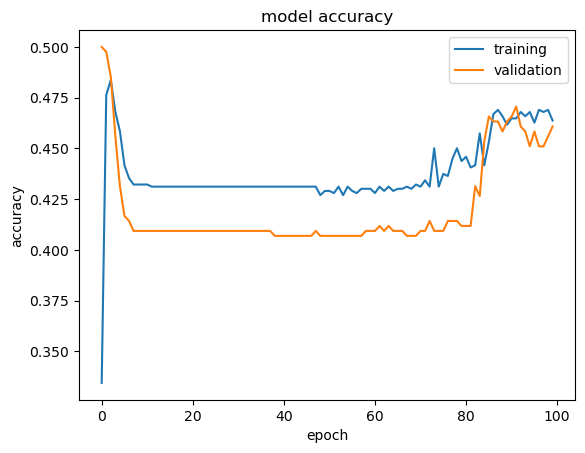

In [158]:
val_loss, val_accuracy  = model.evaluate(normalized_x_test, y_test_1h, verbose=True)
print(val_accuracy)
plot_NN_accuracy(history)

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.8em;color:green;"> Accuracy for out of sample test which is close to in-sample performance. We should find a way to improve over all model performance


1.2003213167190552


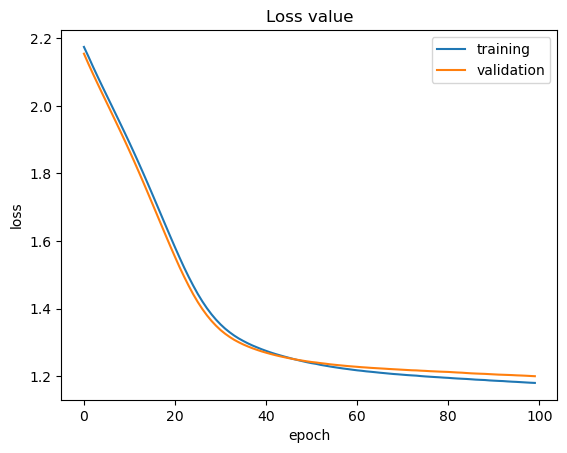

In [159]:
plot_NN_loss(history)

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.8em;color:green;"> The loss is almost same between train and test sample. The Testing loss is little of higher side

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.7em;color:darkorange;">  Part A - Q3 D - Design new architecture/update existing architecture in attempt to improve the performance of the model.


In [160]:
from tensorflow.keras.layers import BatchNormalization, Dropout

In [161]:
# Default model updated with Batch Normalization
def mlp_updated_model(plot=0):
    model = Sequential()
    model.add(Dense(100, input_shape = (normalized_x_train.shape[1], )))
    model.add(BatchNormalization())                    
    model.add(Activation('relu'))
    model.add(Dense(50))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dense(25))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dense(9))
    model.add(BatchNormalization())
    model.add(Activation('softmax'))
    
    my_optimizer = optimizers.SGD(learning_rate = 0.01)
    model.compile(optimizer = my_optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    history = model.fit(normalized_x_train, y_train_1h, validation_data=(normalized_x_test,y_test_1h), 
                        batch_size = 200, epochs = 100, verbose = 0)
    
    val_loss, val_accuracy  = model.evaluate(normalized_x_test, y_test_1h, verbose=True)
    
    display("Validation loss with BatchNormalization and SGD", val_loss)
    display("Validation Accuracy with BatchNormalization and SGD", val_accuracy)
    
    if (plot > 0):
        plot_NN_accuracy(history)
        plot_NN_loss(history)

In [162]:
mlp_updated_model(0)

13/13 [==============================] - 0s 3ms/step - loss: 1.4262 - accuracy: 0.5343


'Validation loss with BatchNormalization and SGD'

1.4261744022369385

'Validation Accuracy with BatchNormalization and SGD'

0.5343137383460999

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.8em;color:green;"> BatchNormalization and SGD is improving accuracy by 2% which is 52% accuracy

In [163]:
def mlp_update_model_with_adam(plot=0):
    model = Sequential()
    model.add(Dense(50, input_shape = (normalized_x_train.shape[1], ),kernel_initializer='he_normal'))
    model.add(BatchNormalization())                    
    model.add(Activation('relu'))
    model.add(Dense(50,kernel_initializer='he_normal'))
    model.add(BatchNormalization())                    
    model.add(Activation('relu'))
    model.add(Dense(50,kernel_initializer='he_normal'))
    model.add(BatchNormalization())                    
    model.add(Activation('relu'))
    model.add(Dense(50,kernel_initializer='he_normal'))
    model.add(BatchNormalization())                    
    model.add(Activation('relu'))
    model.add(Dense(9,kernel_initializer='he_normal'))
    model.add(Activation('softmax'))
    
    my_optimizer = optimizers.Adam(0.001)
    model.compile(optimizer = my_optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    history = model.fit(normalized_x_train, y_train_1h, validation_data=(normalized_x_test,y_test_1h), 
                        batch_size = 200, epochs = 100, verbose = 0)
    
    val_loss, val_accuracy  = model.evaluate(normalized_x_test, y_test_1h, verbose=False)
    
    display("Validation loss with BN and Adam", val_loss)
    display("Validation Accuracy with BN and Adam", val_accuracy)
    
    if (plot > 0):
        plot_NN_accuracy(history)
        plot_NN_loss(history)

In [164]:
mlp_update_model_with_adam()

'Validation loss with BN and Adam'

1.6281626224517822

'Validation Accuracy with BN and Adam'

0.5024510025978088

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.8em;color:green;"> Adam optimizer is giving the same accuracy and  loss

In [165]:
def mlp_update_model_with_sgd_dropout(plot=0):
    model = Sequential()
    model.add(Dense(100, input_shape = (normalized_x_train.shape[1], ), kernel_initializer='he_normal'))
    model.add(Dropout(0.5))
    model.add(BatchNormalization())                    
    model.add(Activation('relu'))
    model.add(Dense(75, kernel_initializer='he_normal'))
    model.add(Dropout(0.5))
    model.add(BatchNormalization())                    
    model.add(Activation('relu'))
    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(Dropout(0.5))
    model.add(BatchNormalization())                    
    model.add(Activation('relu'))
    model.add(Dense(25, kernel_initializer='he_normal'))
    model.add(Dropout(0.5))
    model.add(BatchNormalization())                    
    model.add(Activation('relu'))
    model.add(Dense(9, kernel_initializer='he_normal'))
    model.add(Dropout(0.5))
    model.add(BatchNormalization()) 
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(learning_rate = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    history = model.fit(normalized_x_train, y_train_1h, validation_data=(normalized_x_test,y_test_1h), 
                        batch_size = 100, epochs = 200, verbose = 0)
    
    val_loss, val_accuracy  = model.evaluate(normalized_x_test, y_test_1h, verbose=False)
    
    display("Validation loss with Relu as activation function with Batch Normalization and Dropout", val_loss)
    display("Validation Accuracy ", val_accuracy)
    
    if (plot > 0):
        plot_NN_accuracy(history)
        plot_NN_loss(history)

In [166]:
mlp_update_model_with_sgd_dropout()

'Validation loss with Relu as activation function with Batch Normalization and Dropout'

1.8622007369995117

'Validation Accuracy '

0.3897058963775635

In [167]:
def mlp_update_model_with_adam_dropout(plot=0):
    model = Sequential()
    model.add(Dense(100, input_shape = (normalized_x_train.shape[1], ), kernel_initializer='he_normal'))
    model.add(Dropout(0.5))
    model.add(BatchNormalization())                    
    model.add(Activation('relu'))
    model.add(Dense(75, kernel_initializer='he_normal'))
    model.add(BatchNormalization())                    
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(BatchNormalization())                    
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(25, kernel_initializer='he_normal'))
    model.add(BatchNormalization())                    
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(9, kernel_initializer='he_normal'))
    model.add(Activation('softmax'))
    
    sgd = optimizers.Adam(learning_rate = 0.1)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    history = model.fit(normalized_x_train, y_train_1h, validation_data=(normalized_x_test,y_test_1h), 
                        batch_size = 100, epochs = 200, verbose = 0)
    
    val_loss, val_accuracy  = model.evaluate(normalized_x_test, y_test_1h, verbose=False)
    
    display("Validation loss with Relu as activation function with Batch Normalization and Dropout", val_loss)
    display("Validation Accuracy ", val_accuracy)
    
    if (plot > 0):
        plot_NN_accuracy(history)
        plot_NN_loss(history)

In [168]:
mlp_update_model_with_adam_dropout()

'Validation loss with Relu as activation function with Batch Normalization and Dropout'

1.043391466140747

'Validation Accuracy '

0.5539215803146362

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.8em;color:green;"> The best possible accuracy we can get is between 50 to 55 both SGD and Adam optimizer using Batch Normalization and Dropout

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.8em;color:green;"> Let us play around with batch and epochs and learning rate while using optimizer as Adam and having BN and Dropout in hidden layers.

In [169]:
def mlp_update_model_with_adam_dropout_update(plot=0):
    model = Sequential()
    model.add(Dense(100, input_shape = (normalized_x_train.shape[1], ), kernel_initializer='he_normal'))
    model.add(Dropout(0.5))
    model.add(BatchNormalization())                    
    model.add(Activation('relu'))
    model.add(Dense(75, kernel_initializer='he_normal'))
    model.add(BatchNormalization())                    
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(BatchNormalization())                    
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(25, kernel_initializer='he_normal'))
    model.add(BatchNormalization())                    
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(9, kernel_initializer='he_normal'))
    model.add(Activation('softmax'))
    
    sgd = optimizers.Adam()
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    history = model.fit(normalized_x_train, y_train_1h, validation_data=(normalized_x_test,y_test_1h), 
                        batch_size = 100, epochs = 400, verbose = 0)
    
    val_loss, val_accuracy  = model.evaluate(normalized_x_test, y_test_1h, verbose=False)
    
    display("Validation loss with Relu as activation function with Batch Normalization and Dropout", val_loss)
    display("Validation Accuracy ", val_accuracy)
    
    if (plot > 0):
        plot_NN_accuracy(history)
        plot_NN_loss(history)

In [170]:
mlp_update_model_with_adam_dropout_update()

'Validation loss with Relu as activation function with Batch Normalization and Dropout'

1.1562848091125488

'Validation Accuracy '

0.5343137383460999

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.7em;color:darkorange;">  Part A - Q3 E - Plot visuals as in Q3.C and share insights about difference observed in both the models.


'Validation loss with Relu as activation function with Batch Normalization and Dropout'

1.1676422357559204

'Validation Accuracy '

0.5245097875595093

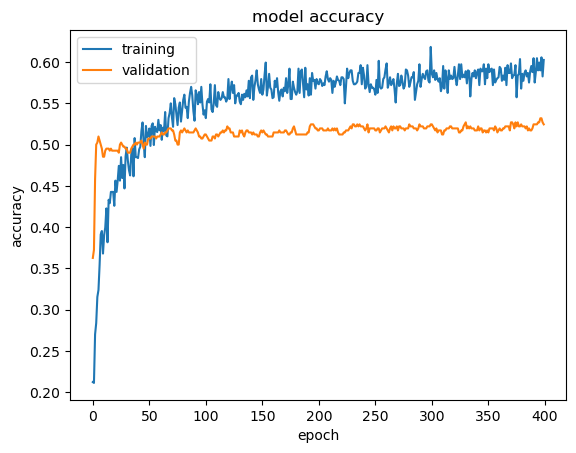

1.2003213167190552


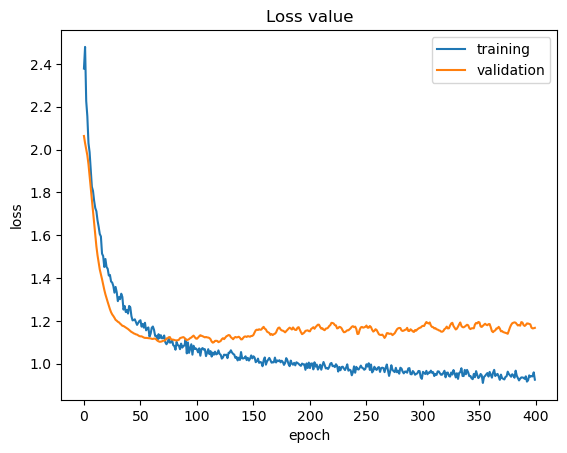

In [171]:
mlp_update_model_with_adam_dropout_update(1)

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.8em;color:green;"> Lowering learning rate (Default=0.001) with batch size of 100 and epoch as 400 gives consistent accuracy and loss. THe accuracy is still under lowest beanch mark which is around 50%

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:1.2em;color:#00b3e5;"> Autonomous Vehicles

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.7em;color:darkorange;">  Part B - Q1 A - Read the .h5 file and assign to a variable.


In [172]:
import h5py
input = "Autonomous_Vehicles_SVHN_single_grey1.h5"

hf = h5py.File(input, "r") 

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.7em;color:darkorange;">  Part B - Q1 B - Print all the keys from the .h5 file.


In [173]:
# Print all root level object names (aka keys) 
# these can be group or dataset names 
print("Keys: %s" % hf.keys())

Keys: <KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>


In [174]:
# get first object name/key; may or may NOT be a group
#a_group_key = list(hf.keys())[0]

# get the object type for a_group_key: usually group or dataset
#print(type(hf[a_group_key])) 

# If a_group_key is a group name, 
# this gets the object names in the group and returns as a list
#data = list(hf[a_group_key])

# If a_group_key is a dataset name, 
# this gets the dataset values and returns as a list
#data = list(hf[a_group_key])
# preferred methods to get dataset values:
#ds_obj = hf[a_group_key]      # returns as a h5py dataset object
#ds_arr = hf[a_group_key][()]  # returns as a numpy array

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.7em;color:darkorange;">  Part B - Q1 C - Split the data into X_train, X_test, Y_train, Y_test


In [175]:
X_train = np.array(hf.get('X_train'))
X_test = np.array(hf.get('X_test'))
X_val = np.array(hf.get('X_val'))
Y_train = np.array(hf.get('y_train'))
Y_test = np.array(hf.get('y_test'))
Y_val = np.array(hf.get('y_val'))

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.7em;color:darkorange;">  Part B - Q2 A - Print shape of all the 4 data split into x, y, train, test to verify if x & y is in sync.


In [176]:
print(f"XTrain shape is {X_train.shape} and XTest shape is {X_test.shape} and validation shape is {X_val.shape} ")
print(f"YTrain shape is {Y_train.shape} and YTest shape is {Y_test.shape} and validation shape is {Y_val.shape} ")

XTrain shape is (42000, 32, 32) and XTest shape is (18000, 32, 32) and validation shape is (60000, 32, 32) 
YTrain shape is (42000,) and YTest shape is (18000,) and validation shape is (60000,) 


## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.7em;color:darkorange;">  Part B - Q2 B - Visualise first 10 images in train data and print its corresponding labels.


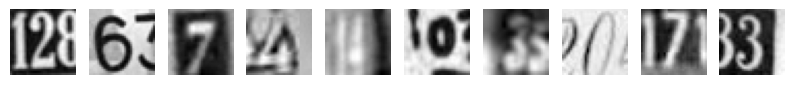

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [177]:
# visualizing the first 10 images in the dataset and their labels
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i],cmap="gray")
    plt.axis('off')
plt.show()
print('label for each of the above image: %s' % (Y_train[0:10]))

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.7em;color:darkorange;">  Part B - Q2 C -Reshape all the images with appropriate shape update the data in same variable.


In [178]:
# Flatten the images
image_vector_size = 32*32
X_train = X_train.reshape(X_train.shape[0], image_vector_size)
X_test = X_test.reshape(X_test.shape[0], image_vector_size)
X_val = X_val.reshape(X_val.shape[0], image_vector_size)

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.7em;color:darkorange;">  Part B - Q2 D - Normalise the images i.e. Normalise the pixel values.


In [179]:
# # normalize inputs from 0-255 to 0-1
X_train = X_train / 255.0
X_test = X_test / 255.0
X_val = X_val / 255.0

print('Training set', X_train.shape, Y_train.shape)
print('Test set', X_test.shape, Y_test.shape)
print('Val set', X_val.shape, Y_val.shape)

Training set (42000, 1024) (42000,)
Test set (18000, 1024) (18000,)
Val set (60000, 1024) (60000,)


In [180]:
display(X_train)

array([[0.12968785, 0.11866706, 0.10530196, ..., 0.19477727, 0.19942354,
        0.20799099],
       [0.34101608, 0.3414451 , 0.34656274, ..., 0.29498273, 0.30054745,
        0.31092745],
       [0.48284313, 0.49356118, 0.47872823, ..., 0.36837214, 0.41093138,
        0.44637334],
       ...,
       [0.6042902 , 0.61100274, 0.6149663 , ..., 0.52993256, 0.53592   ,
        0.5398412 ],
       [0.8137075 , 0.8176286 , 0.8353796 , ..., 0.83974785, 0.8319055 ,
        0.820142  ],
       [0.37285647, 0.37677765, 0.39246237, ..., 0.5414914 , 0.5509529 ,
        0.5509529 ]], dtype=float32)

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.7em;color:darkorange;">  Part B - Q2 E - Transform Labels into format acceptable by Neural Network


In [181]:
# Convert to "one-hot" vectors using the to_categorical function
num_classes = 10
Y_train_1h = keras.utils.to_categorical(Y_train, num_classes)
Y_test_1h = keras.utils.to_categorical(Y_test,num_classes)

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.7em;color:darkorange;">  Part B - Q2 F - Print total Number of classes in the Dataset.


In [182]:
print("Total number of classes \n", np.unique(Y_train))
print("Total number of classes \n", np.unique(Y_test))

Total number of classes 
 [0 1 2 3 4 5 6 7 8 9]
Total number of classes 
 [0 1 2 3 4 5 6 7 8 9]


## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.7em;color:darkorange;">  Part B - Q3 A - Design a Neural Network to train a classifier.


In [183]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from sklearn.metrics import classification_report

In [184]:
# we will use all default optimizer RMSProp, learning rate with 1 input and 1 output layer with 3 hidden layers
# However we will use relu in input and hidden layer. Softmax activiation function in output layer.
def get_default_sequential_model():
    # create model
    model = Sequential()  
    model.add(Dense(256, activation='relu',input_shape=(image_vector_size,)))
    model.add(Dense(148, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    my_optimizer = optimizers.RMSprop(learning_rate=0.001)
    model.compile(loss='categorical_crossentropy', optimizer=my_optimizer, metrics=['accuracy'])
    return model

In [185]:
# All are same as default except we are using Adam optimizer with LR as 0.01 and Kernel_initializer as 'he_uniform'
def get_optimized_model_1():
    model = Sequential()  
    model.add(Dense(256, activation='relu',kernel_initializer='he_uniform',input_shape=(image_vector_size,)))
    model.add(Dense(148, activation='relu',kernel_initializer='he_uniform'))
    model.add(Dense(64, activation='relu',kernel_initializer='he_uniform'))
    model.add(Dense(32, activation='relu',kernel_initializer='he_uniform'))
    model.add(Dense(num_classes, activation='softmax'))
    my_optimizer = optimizers.Adam(learning_rate=0.01)
    model.compile(loss='categorical_crossentropy', optimizer=my_optimizer, metrics=['accuracy'])
    return model

In [186]:
# All are same as default except we are using Adam optimizer with LR as 0.01, We will have dropout and Batch Normalization
def get_optimized_model_2():
    model = Sequential()  
    model.add(Dense(256, activation='relu',kernel_initializer='he_uniform',input_shape=(image_vector_size,)))
    model.add(Dropout(0.5))
    model.add(BatchNormalization())
    model.add(Dense(148, activation='relu',kernel_initializer='he_uniform'))
    model.add(Dropout(0.5))
    model.add(BatchNormalization())
    model.add(Dense(64, activation='relu',kernel_initializer='he_uniform'))
    model.add(Dropout(0.5))
    model.add(BatchNormalization())
    model.add(Dense(32, activation='relu',kernel_initializer='he_uniform'))
    model.add(Dropout(0.5))
    model.add(BatchNormalization())
    model.add(Dense(num_classes, activation='softmax'))
    my_optimizer = optimizers.Adam(learning_rate=0.01)
    model.compile(loss='categorical_crossentropy', optimizer=my_optimizer, metrics=['accuracy'])
    return model

In [187]:
# Let us change the optimizer to SGD
def get_optimized_model_3():
    model = Sequential()  
    model.add(Dense(256, activation='relu',kernel_initializer='he_uniform',input_shape=(image_vector_size,)))
    model.add(Dropout(0.5))
    model.add(BatchNormalization())
    model.add(Dense(148, activation='relu',kernel_initializer='he_uniform'))
    model.add(Dropout(0.5))
    model.add(BatchNormalization())
    model.add(Dense(64, activation='relu',kernel_initializer='he_uniform'))
    model.add(Dropout(0.5))
    model.add(BatchNormalization())
    model.add(Dense(32, activation='relu',kernel_initializer='he_uniform'))
    model.add(Dropout(0.5))
    model.add(BatchNormalization())
    model.add(Dense(num_classes, activation='softmax'))
    my_optimizer = optimizers.SGD(learning_rate=0.01)
    model.compile(loss='categorical_crossentropy', optimizer=my_optimizer, metrics=['accuracy'])
    return model

In [188]:
# Let us add more hidden layers
def get_optimized_model_4():
    model = Sequential()  
    model.add(Dense(256, activation='relu',kernel_initializer='he_uniform',input_shape=(image_vector_size,)))
    model.add(Dropout(0.5))
    model.add(BatchNormalization())
    model.add(Dense(148, activation='relu',kernel_initializer='he_uniform'))
    model.add(Dropout(0.5))
    model.add(BatchNormalization())
    model.add(Dense(148, activation='relu',kernel_initializer='he_uniform'))
    model.add(Dropout(0.5))
    model.add(BatchNormalization())
    model.add(Dense(64, activation='relu',kernel_initializer='he_uniform'))
    model.add(Dropout(0.5))
    model.add(BatchNormalization())
    model.add(Dense(64, activation='relu',kernel_initializer='he_uniform'))
    model.add(Dropout(0.5))
    model.add(BatchNormalization())
    model.add(Dense(32, activation='relu',kernel_initializer='he_uniform'))
    model.add(Dropout(0.5))
    model.add(BatchNormalization())
    model.add(Dense(num_classes, activation='softmax'))
    my_optimizer = optimizers.SGD(learning_rate=0.1)
    model.compile(loss='categorical_crossentropy', optimizer=my_optimizer, metrics=['accuracy'])
    return model

In [189]:
# Let us use he_normal as kernel_initializer with Adam
def get_optimized_model_5():
    model = Sequential()
    
    model.add(Dense(256, input_shape = (image_vector_size, ), kernel_initializer='he_normal'))
    model.add(Activation('relu'))
    model.add(Dense(148, kernel_initializer='he_normal'))
    model.add(Activation('relu'))
    model.add(Dense(64, kernel_initializer='he_normal'))
    model.add(Activation('relu'))
    model.add(Dense(32, kernel_initializer='he_normal'))
    model.add(Activation('relu'))
    model.add(Dense(num_classes, kernel_initializer='he_normal'))
    model.add(Activation('softmax'))
    my_optimizer = optimizers.Adam(learning_rate=0.1)
    model.compile(optimizer = my_optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [190]:
# Let us use he_normal as kernel_initializer with Adam + Batch Normalization
def get_optimized_model_6():
    model = Sequential()
    
    model.add(Dense(256, input_shape = (image_vector_size, ), kernel_initializer='he_normal'))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Dense(148, kernel_initializer='he_normal'))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Dense(64, kernel_initializer='he_normal'))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Dense(32, kernel_initializer='he_normal'))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Dense(num_classes, kernel_initializer='he_normal'))
    model.add(Activation('softmax'))
    my_optimizer = optimizers.Adam(learning_rate=0.001)
    model.compile(optimizer = my_optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [191]:
# Let us use he_normal as kernel_initializer with Adam + Batch Normalization + Dropout
def get_optimized_model_7():
    model = Sequential()
    
    model.add(Dense(256, input_shape = (image_vector_size, ), kernel_initializer='he_normal'))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(BatchNormalization())
    model.add(Dense(148, kernel_initializer='he_normal'))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(BatchNormalization())
    model.add(Dense(64, kernel_initializer='he_normal'))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(BatchNormalization())
    model.add(Dense(32, kernel_initializer='he_normal'))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(BatchNormalization())
    model.add(Dense(num_classes, kernel_initializer='he_normal'))
    model.add(Activation('softmax'))
    my_optimizer = optimizers.Adam(learning_rate=0.001)
    model.compile(optimizer = my_optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.7em;color:darkorange;">  Part B - Q3 B - Train the classifier using previously designed Architecture (Use best suitable parameters).


In [192]:
#checkpoint = ModelCheckpoint("model_weights_1.h5",monitor='val_accuracy',
#                            save_weights_only=True, model='max',verbose=1)
#reduce_lr = ReduceLROnPlateau(monitor='val_loss',factor=0.1,patience=2,min_lr=0.00001,model='auto')

#callbacks = [checkpoint,reduce_lr]


In [193]:
model = get_default_sequential_model()
#history=model.fit(X_train, Y_train_1h, epochs=400, batch_size=50, verbose=False)
history=model.fit(X_train, Y_train_1h, epochs=10, batch_size=50, verbose=False)
val_loss, val_accuracy  = model.evaluate(X_test, Y_test_1h, verbose=True)

563/563 [==============================] - 5s 9ms/step - loss: 1.0095 - accuracy: 0.6782


## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.8em;color:green;">  Default Model Failed

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.8em;color:green;"> We have to be careful with epoch selection - the in-sample size is 42K and having higher number of epoch will take lot of time. We will try with lower number of epoch (say 10) and then for a better observation on the model we will try with higher number of epoch to find out the accuracy. 

In [194]:
model = get_optimized_model_1()
history=model.fit(X_train, Y_train_1h, validation_data=(X_test,Y_test_1h), epochs=10, batch_size=200, verbose=False)
val_loss, val_accuracy  = model.evaluate(X_test, Y_test_1h, verbose=True)

563/563 [==============================] - 5s 9ms/step - loss: 2.3032 - accuracy: 0.0955


## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.8em;color:green;">  Model Failed

In [195]:
model = get_optimized_model_2()
history=model.fit(X_train, Y_train_1h, epochs=10, batch_size=200, verbose=False)
val_loss, val_accuracy  = model.evaluate(X_test, Y_test_1h, verbose=True)

563/563 [==============================] - 4s 7ms/step - loss: 2.2073 - accuracy: 0.1503


## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.8em;color:green;">  Model Failed

In [196]:
model = get_optimized_model_3()
history=model.fit(X_train, Y_train_1h, validation_data=(X_test,Y_test_1h), epochs=10, batch_size=200, verbose=False)
val_loss, val_accuracy  = model.evaluate(X_test, Y_test_1h, verbose=True)

563/563 [==============================] - 5s 8ms/step - loss: 2.2994 - accuracy: 0.1097


## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.8em;color:green;">  Model Failed

In [197]:
model = get_optimized_model_4()
history=model.fit(X_train, Y_train_1h, epochs=10, batch_size=200, verbose=False)
val_loss, val_accuracy  = model.evaluate(X_test, Y_test_1h, verbose=True)

563/563 [==============================] - 5s 9ms/step - loss: 2.3030 - accuracy: 0.1018


## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.8em;color:green;">  Model Failed

In [198]:
model = get_optimized_model_5()
history=model.fit(X_train, Y_train_1h, validation_data=(X_test,Y_test_1h), epochs=10, batch_size=200, verbose=False)
val_loss, val_accuracy  = model.evaluate(X_test, Y_test_1h, verbose=True)

563/563 [==============================] - 4s 7ms/step - loss: 2.3043 - accuracy: 0.0982


## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.8em;color:green;">  Model Failed

In [199]:
model = get_optimized_model_6()
history=model.fit(X_train, Y_train_1h, validation_data=(X_test,Y_test_1h),  epochs=10, batch_size=100, verbose=False)
val_loss, val_accuracy  = model.evaluate(X_test, Y_test_1h, verbose=True)

563/563 [==============================] - 4s 7ms/step - loss: 0.8873 - accuracy: 0.7232


## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.8em;color:green;">  Model accuracy shows good accuracy which is a good improvement considering all the above varitions. This is using Batch Normalization which means the model has influenced with Covarient shift which is normalized using Batch Normalization

In [200]:
model = get_optimized_model_7()
history=model.fit(X_train, Y_train_1h, validation_data=(X_test,Y_test_1h), epochs=10, batch_size=100, verbose=False)
val_loss, val_accuracy  = model.evaluate(X_test, Y_test_1h, verbose=True)

563/563 [==============================] - 5s 8ms/step - loss: 2.3024 - accuracy: 0.1024


## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.8em;color:green;"> Addition of dropout is not giving improvement.

In [201]:
model = get_optimized_model_6()
history=model.fit(X_train, Y_train_1h, validation_data=(X_test,Y_test_1h), epochs=100, batch_size=50, verbose=False)
val_loss, val_accuracy  = model.evaluate(X_test, Y_test_1h, verbose=True)

563/563 [==============================] - 16s 14ms/step - loss: 0.6462 - accuracy: 0.8131


## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.8em;color:green;"> Updating epochs and batch_size gives better accuracy

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.7em;color:darkorange;">  Part B - Q3 C - Evaluate performance of the model with appropriate metrics.


In [202]:
y_pred_1=model.predict(X_test)
y_pred_final_1=[]
for i in y_pred_1:
  y_pred_final_1.append(np.argmax(i))

print(classification_report(Y_test,y_pred_final_1))

563/563 [==============================] - 7s 12ms/step
              precision    recall  f1-score   support

           0       0.86      0.80      0.83      1814
           1       0.80      0.83      0.81      1828
           2       0.88      0.78      0.83      1803
           3       0.78      0.77      0.77      1719
           4       0.87      0.85      0.86      1812
           5       0.80      0.82      0.81      1768
           6       0.83      0.81      0.82      1832
           7       0.79      0.88      0.83      1808
           8       0.77      0.78      0.78      1812
           9       0.76      0.80      0.78      1804

    accuracy                           0.81     18000
   macro avg       0.81      0.81      0.81     18000
weighted avg       0.82      0.81      0.81     18000



## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.7em;color:darkorange;">  Part B - Q3 D - Plot the training loss, validation loss vs number of epochs and training accuracy, validation accuracy vs number of epochs plot and write your observations on the same.

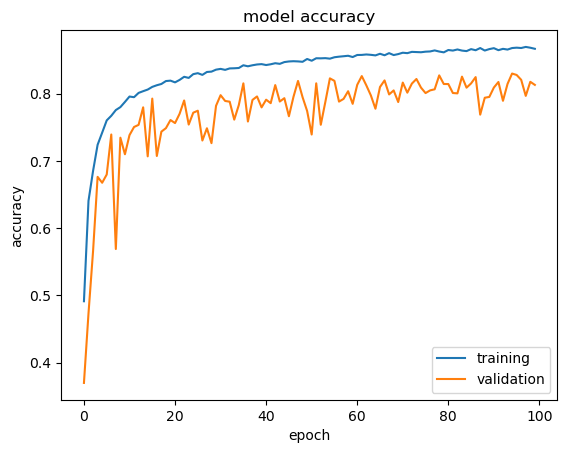

In [203]:
plot_NN_accuracy(history)

0.6461547017097473


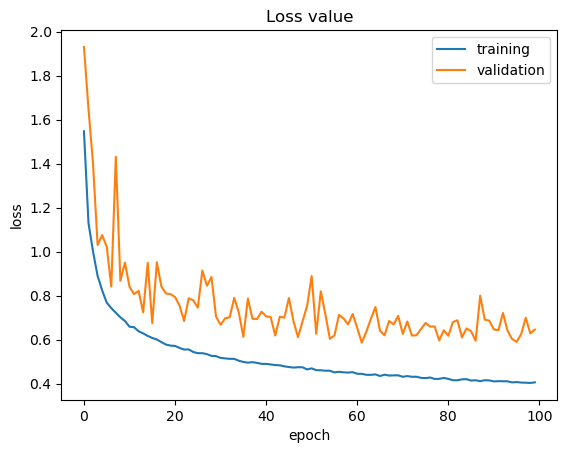

In [204]:
plot_NN_loss(history)

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.8em;color:green;"> Using appropriate epoch and batch size with Batch Normalization gives good accuracy in testing sample as well. It is comparable with training sample. However the model should be updated to make it smooth. The model does provide less accuracy in predicting some target.